In [1]:
import pandas as pd
import json as js
import csv
import matplotlib.pyplot as plt
import numpy as np
import math as m
import seaborn as sns
# import scipy

In [2]:
file_path = 'Usability_study_data.csv'
data = pd.read_csv(file_path)

In [3]:
data = data.drop(['Timestamp', 'Email Address'], axis=1)

In [4]:
keys = data.columns.tolist()

In [5]:
questions = {}

for key in keys:
    question = (key[:key.find("[")].strip())
    framework = key[key.find("["):].strip()
    if framework in ['[DSPy]','[LMQL]','[MTLLM]']:
        if question != 'Would you recommend this framework to others?':
            if question not in questions.keys():
                questions[question] = pd.DataFrame()
            questions[question][framework] = (((data.map(lambda x: x[0] if isinstance(x, str) else x))[key]).astype(int))

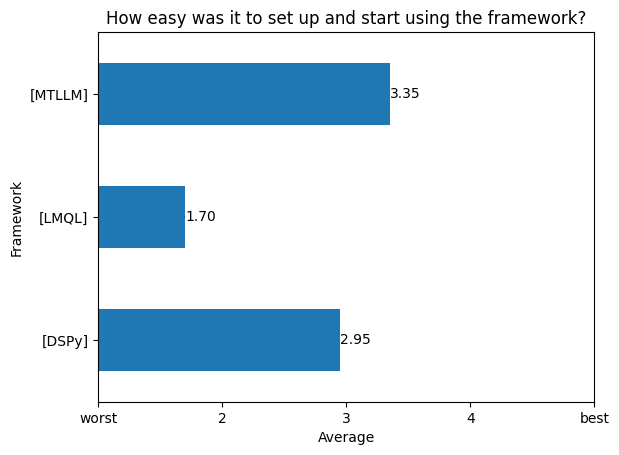

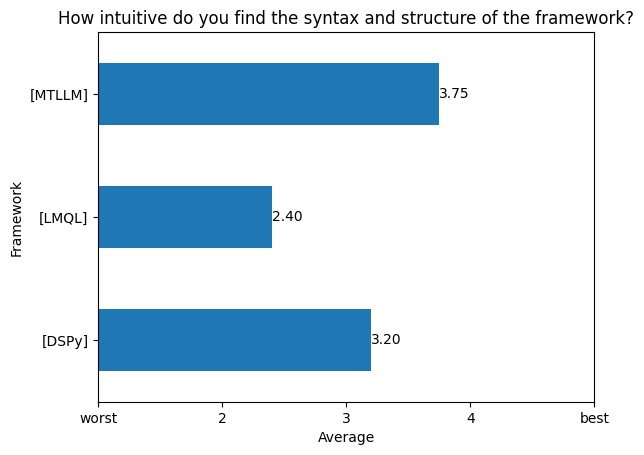

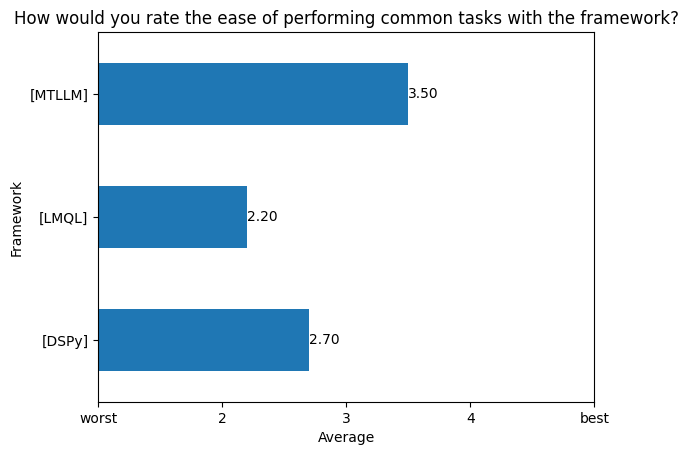

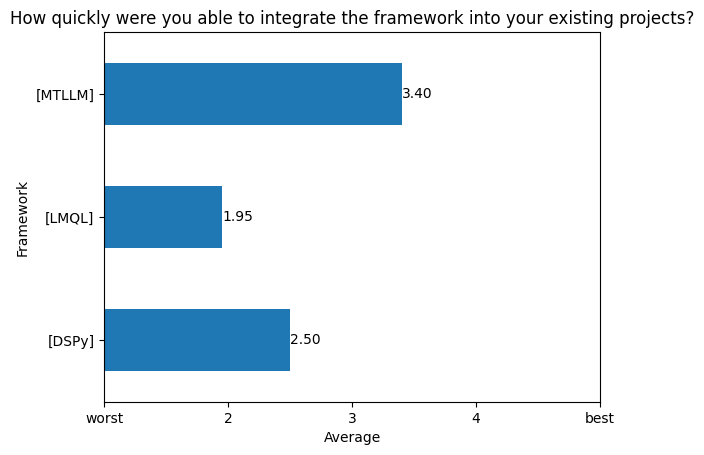

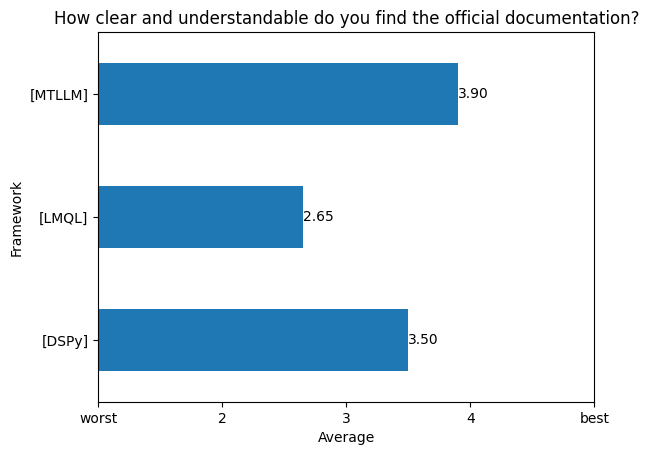

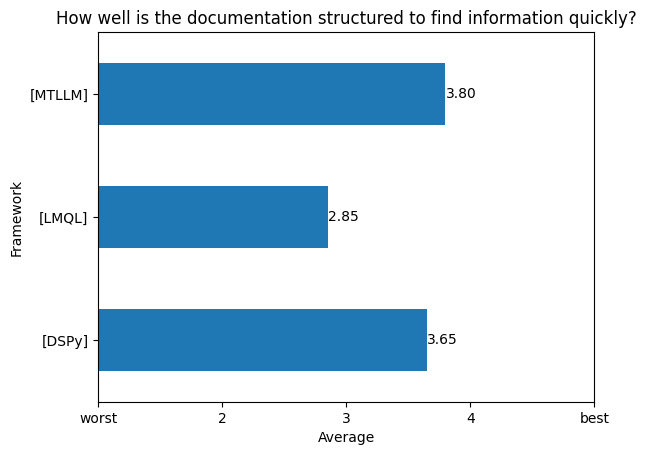

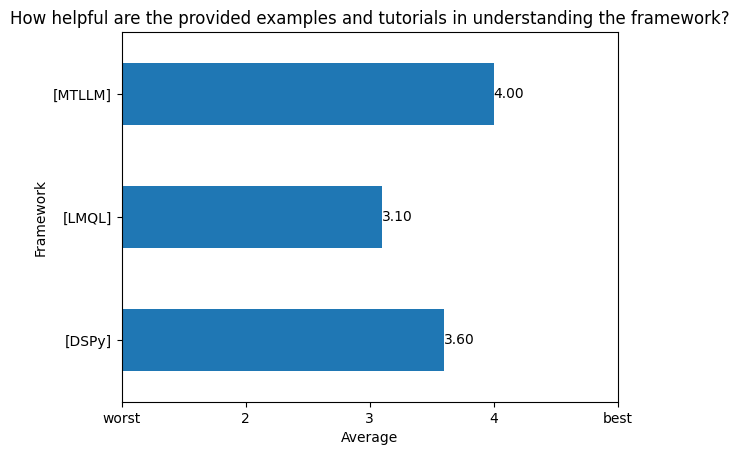

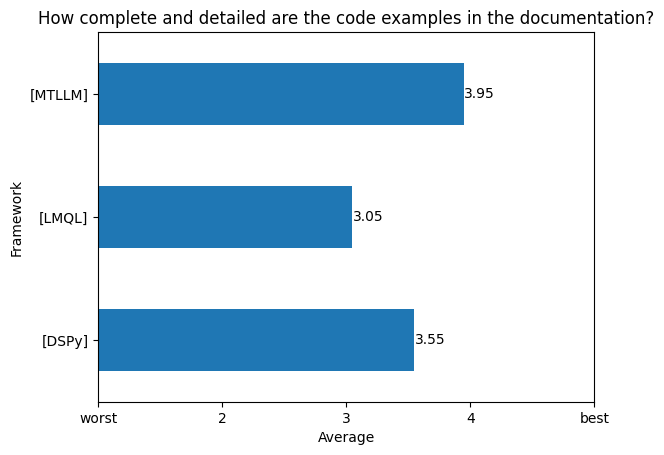

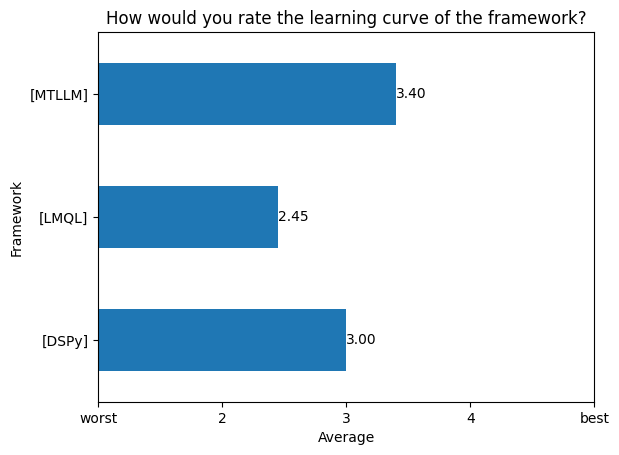

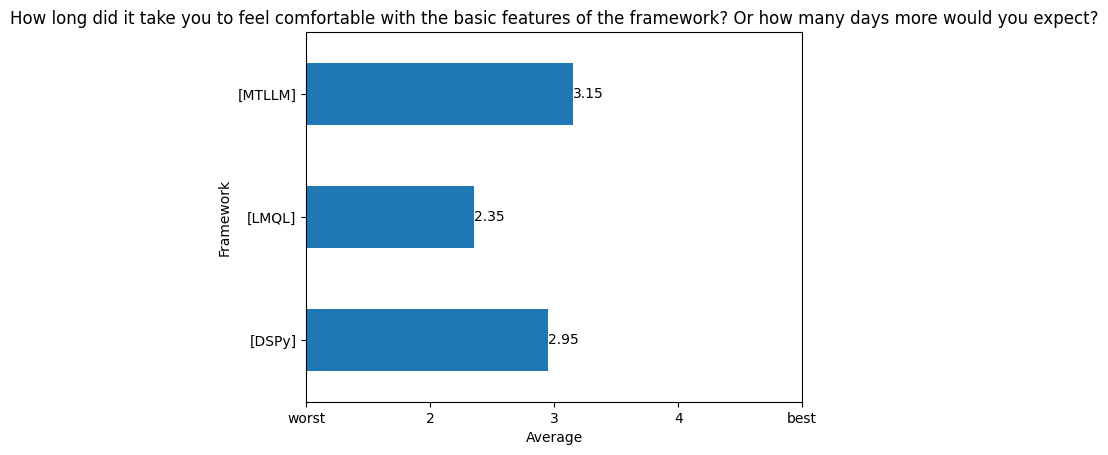

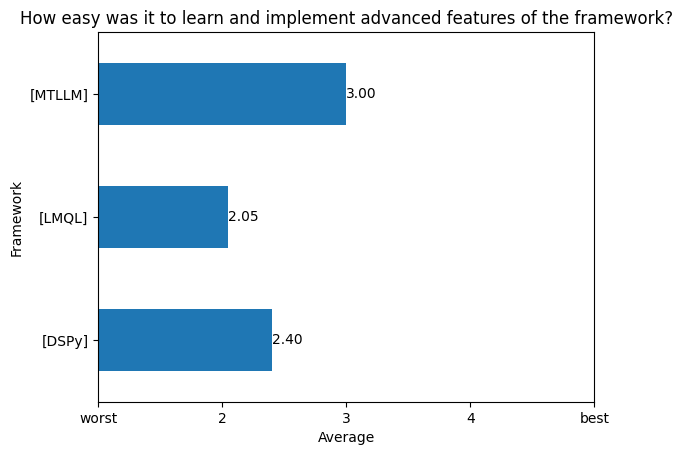

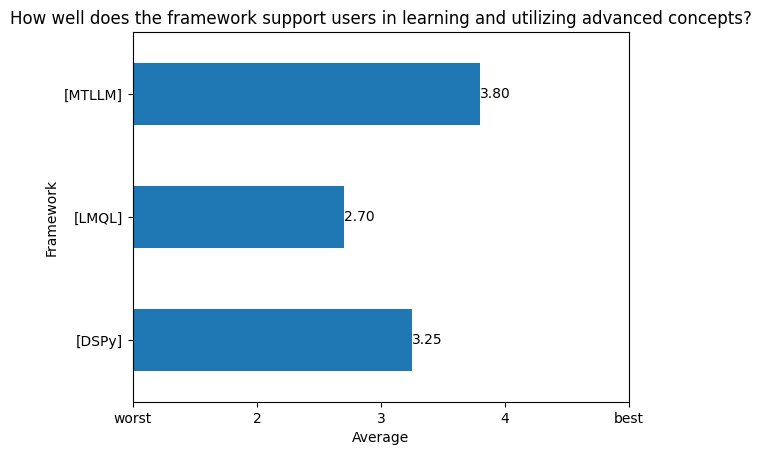

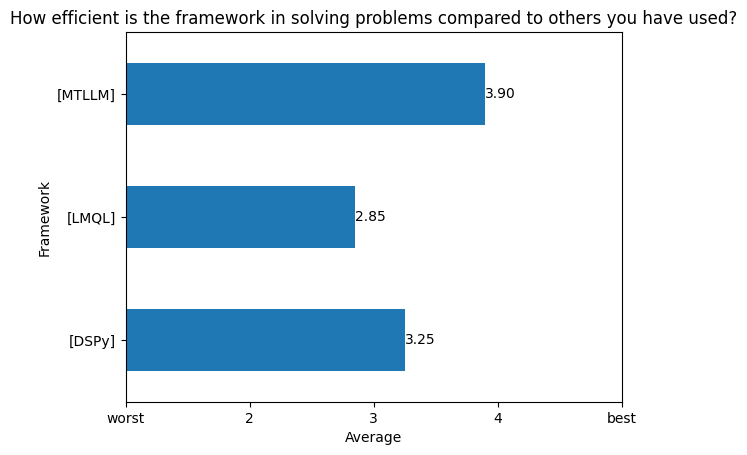

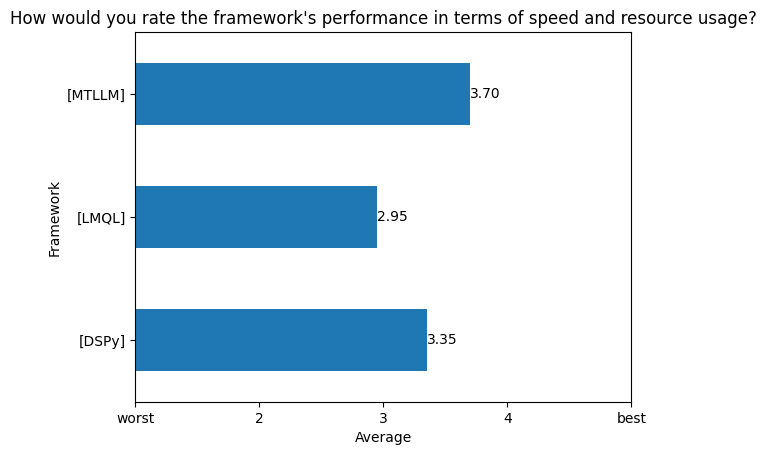

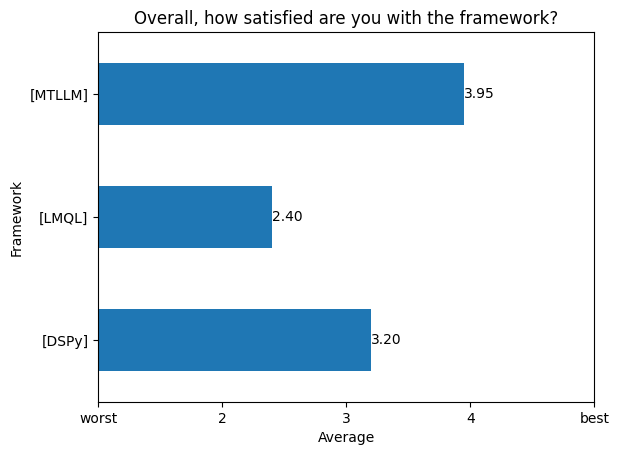

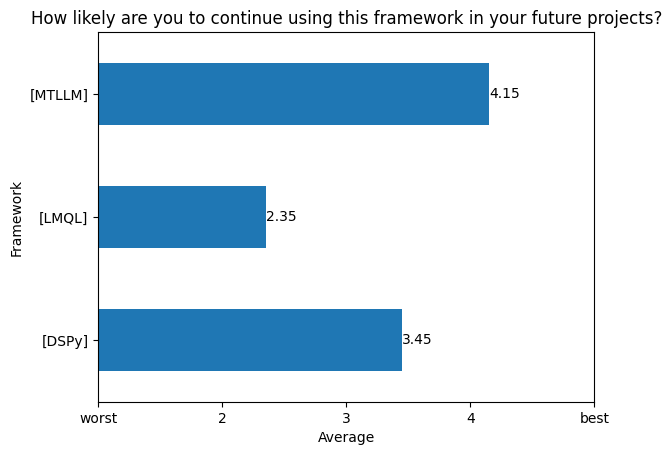

In [6]:
import matplotlib.pyplot as plt

for question, df in questions.items():
    means = df.mean()
    means.plot(kind='barh')
    plt.title(question)
    plt.xlabel('Average')
    plt.ylabel('Framework')
    plt.xlim(1, 5)
    plt.xticks([1, 2, 3, 4, 5], ['worst', 2, 3, 4, 'best'])
    for index, value in enumerate(means):
        plt.text(value, index, f'{value:.2f}', va='center')
    plt.show()

[<matplotlib.patches.Rectangle object at 0x7fbc19fe3ef0>, <matplotlib.patches.Rectangle object at 0x7fbc19e768d0>, <matplotlib.patches.Rectangle object at 0x7fbc19dee2a0>]


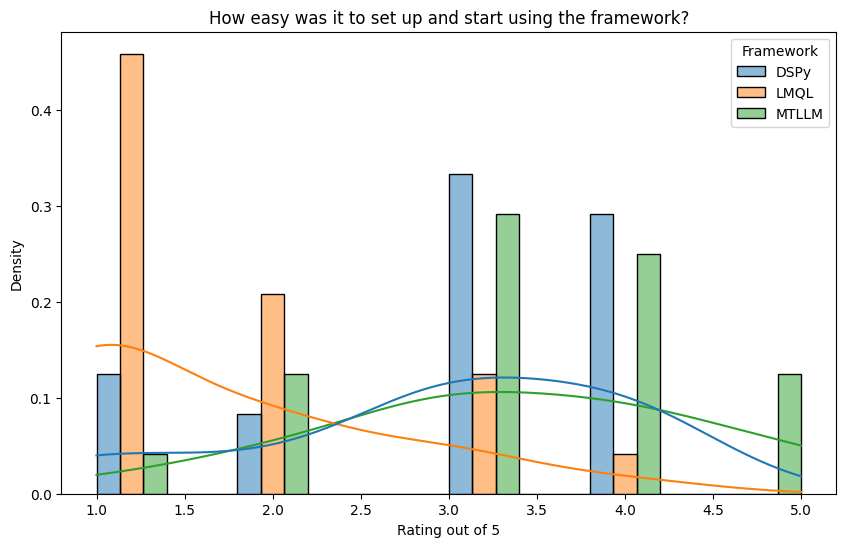

[<matplotlib.patches.Rectangle object at 0x7fbc19bddc10>, <matplotlib.patches.Rectangle object at 0x7fbc19bdf620>, <matplotlib.patches.Rectangle object at 0x7fbc1b805370>]


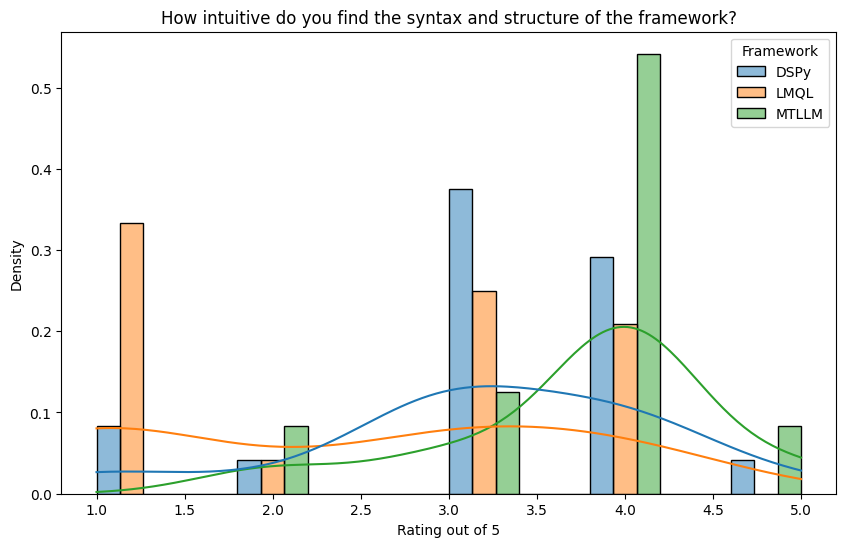

[<matplotlib.patches.Rectangle object at 0x7fbc1b805a60>, <matplotlib.patches.Rectangle object at 0x7fbc26317470>, <matplotlib.patches.Rectangle object at 0x7fbc263154f0>]


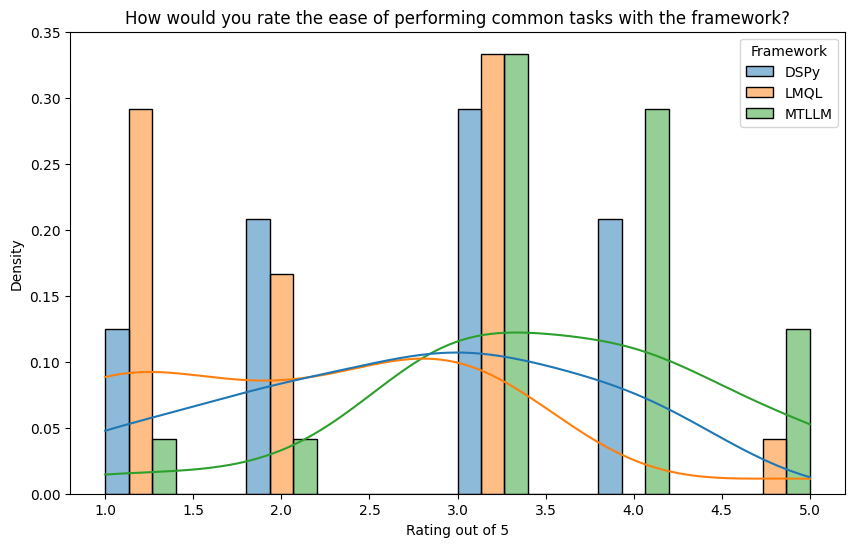

[<matplotlib.patches.Rectangle object at 0x7fbc25e2c380>, <matplotlib.patches.Rectangle object at 0x7fbc1b26c9e0>, <matplotlib.patches.Rectangle object at 0x7fbc19a47aa0>]


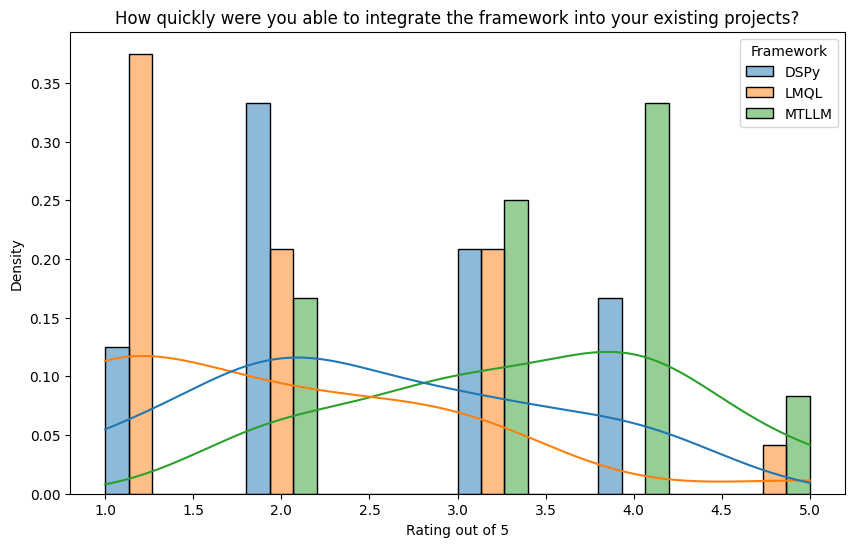

[<matplotlib.patches.Rectangle object at 0x7fbc197b6540>, <matplotlib.patches.Rectangle object at 0x7fbc19610200>, <matplotlib.patches.Rectangle object at 0x7fbc19610530>]


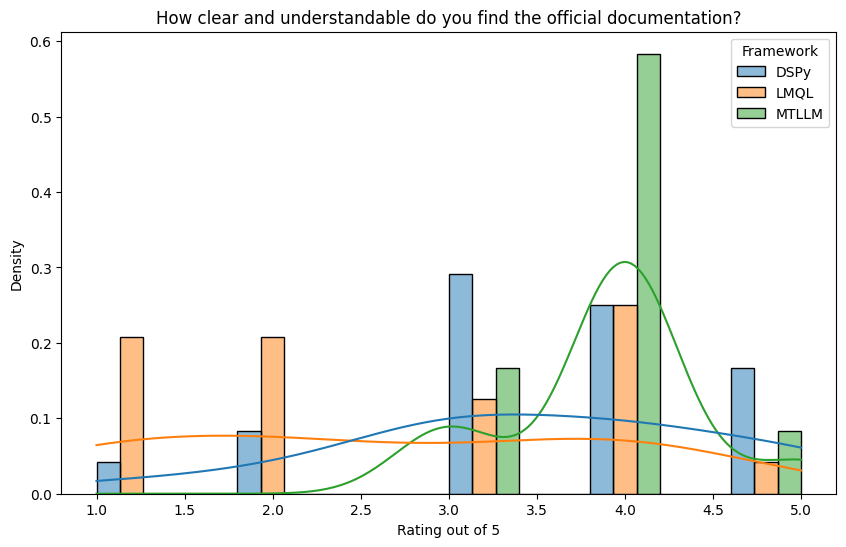

[<matplotlib.patches.Rectangle object at 0x7fbc19fe21e0>, <matplotlib.patches.Rectangle object at 0x7fbc19fe14f0>, <matplotlib.patches.Rectangle object at 0x7fbc19fe3740>]


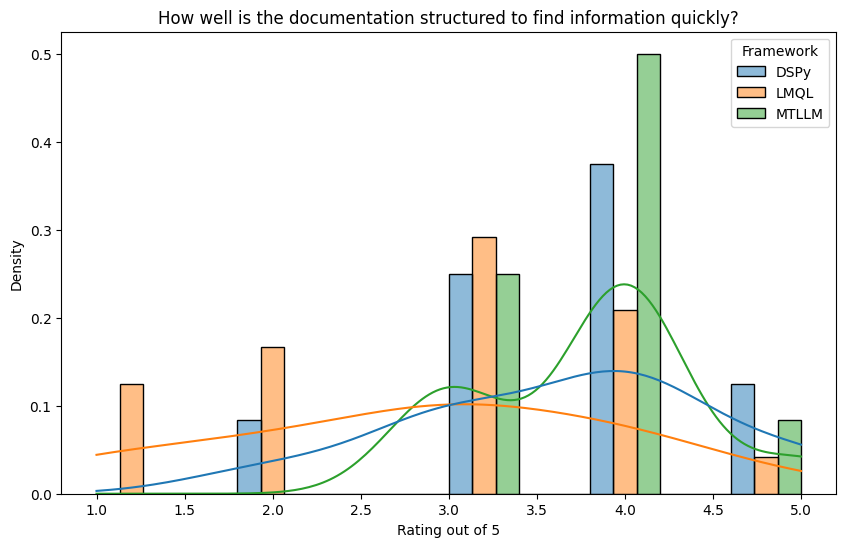

[<matplotlib.patches.Rectangle object at 0x7fbc1b6d0980>, <matplotlib.patches.Rectangle object at 0x7fbc1b6d0800>, <matplotlib.patches.Rectangle object at 0x7fbc1b6d1ac0>]


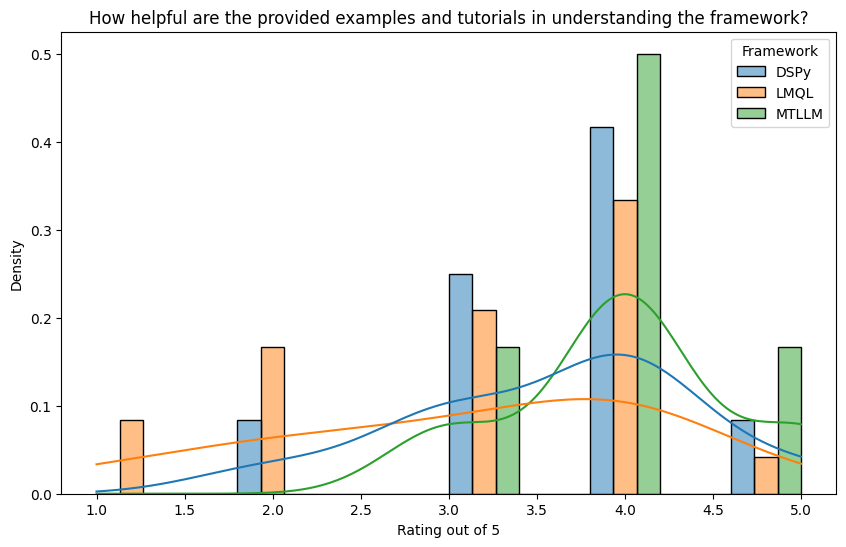

[<matplotlib.patches.Rectangle object at 0x7fbc2c3746b0>, <matplotlib.patches.Rectangle object at 0x7fbc2c376930>, <matplotlib.patches.Rectangle object at 0x7fbc1b827b30>]


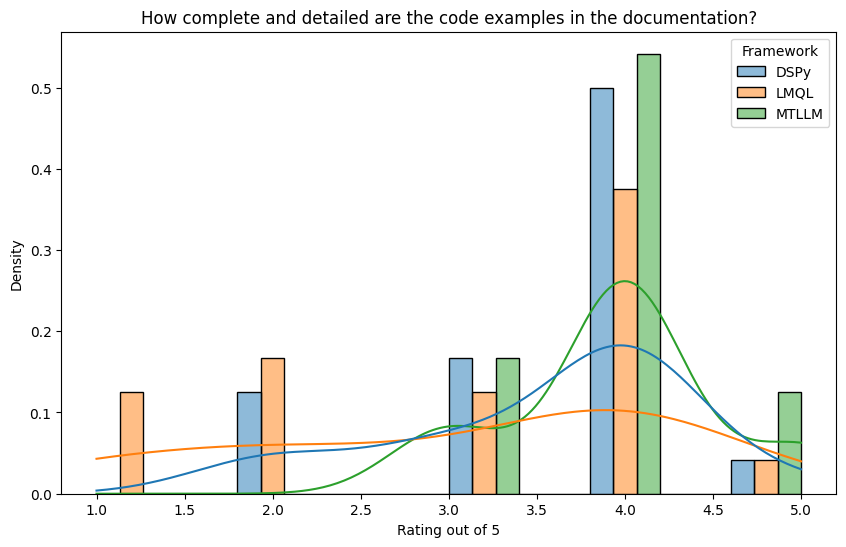

[<matplotlib.patches.Rectangle object at 0x7fbc26544680>, <matplotlib.patches.Rectangle object at 0x7fbc1b93ce00>, <matplotlib.patches.Rectangle object at 0x7fbc1b93d850>]


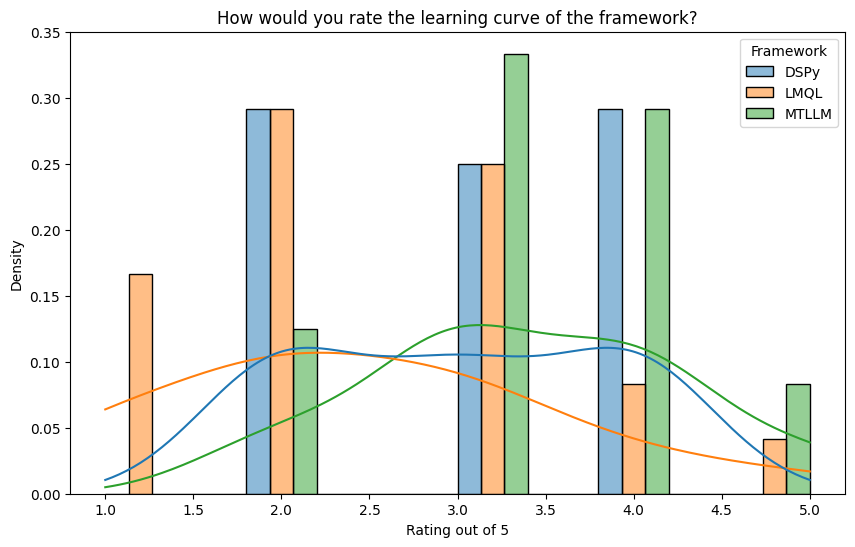

[<matplotlib.patches.Rectangle object at 0x7fbc268458e0>, <matplotlib.patches.Rectangle object at 0x7fbc2620daf0>, <matplotlib.patches.Rectangle object at 0x7fbc2620cfe0>]


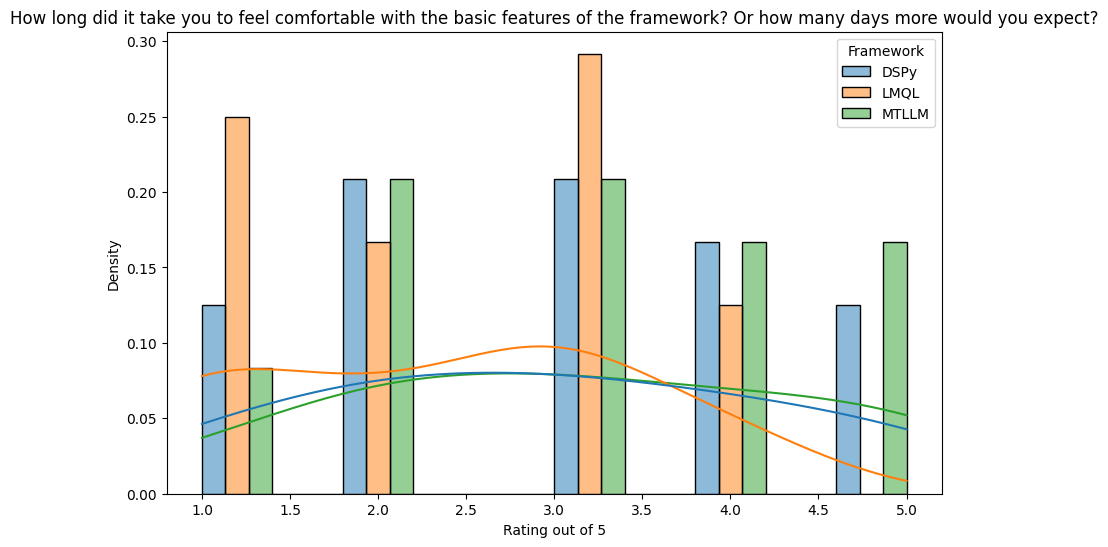

[<matplotlib.patches.Rectangle object at 0x7fbc25d6df70>, <matplotlib.patches.Rectangle object at 0x7fbc25d6e8a0>, <matplotlib.patches.Rectangle object at 0x7fbc25d6c080>]


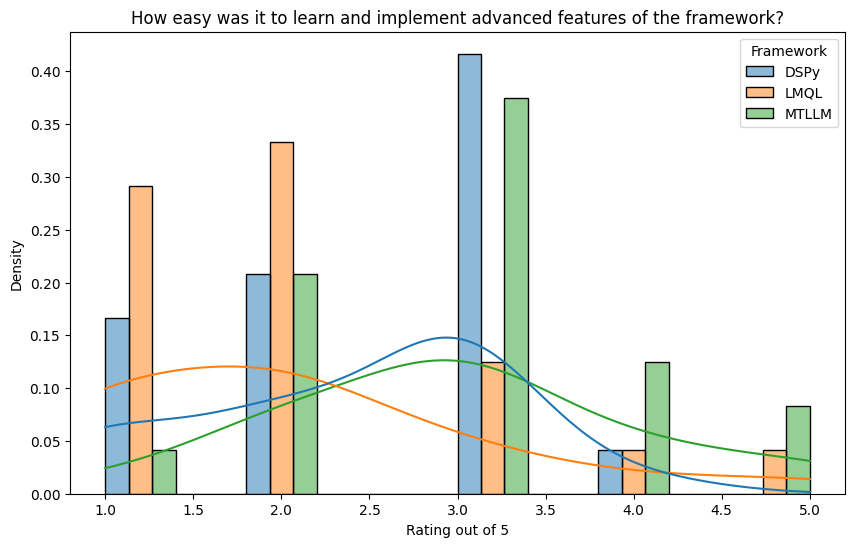

[<matplotlib.patches.Rectangle object at 0x7fbc263e1d30>, <matplotlib.patches.Rectangle object at 0x7fbc26386c00>, <matplotlib.patches.Rectangle object at 0x7fbc2c366540>]


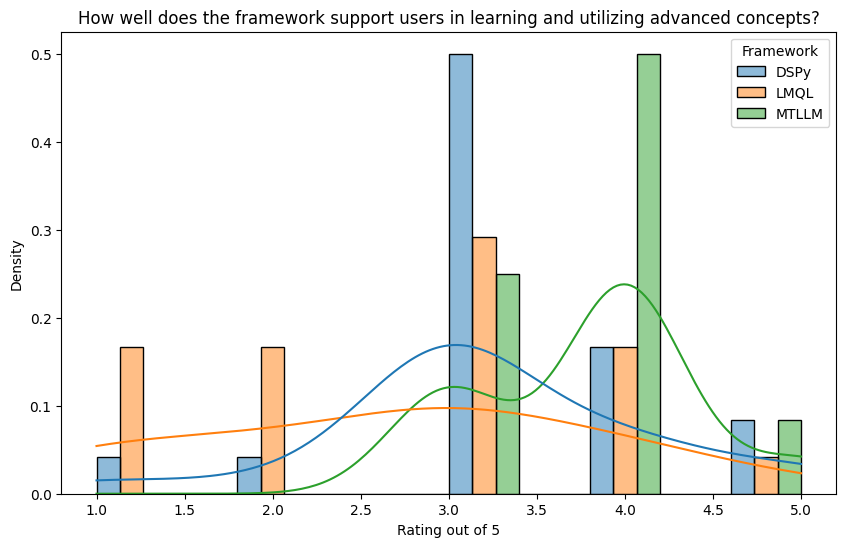

[<matplotlib.patches.Rectangle object at 0x7fbc26798140>, <matplotlib.patches.Rectangle object at 0x7fbc2679aa50>, <matplotlib.patches.Rectangle object at 0x7fbc2c3ab3e0>]


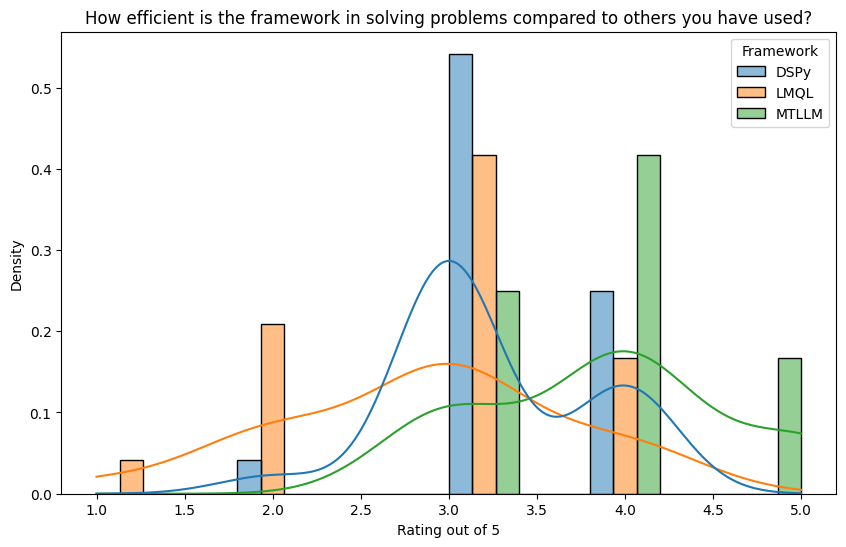

[<matplotlib.patches.Rectangle object at 0x7fbc2ca758b0>, <matplotlib.patches.Rectangle object at 0x7fbc26013350>, <matplotlib.patches.Rectangle object at 0x7fbc2c392060>]


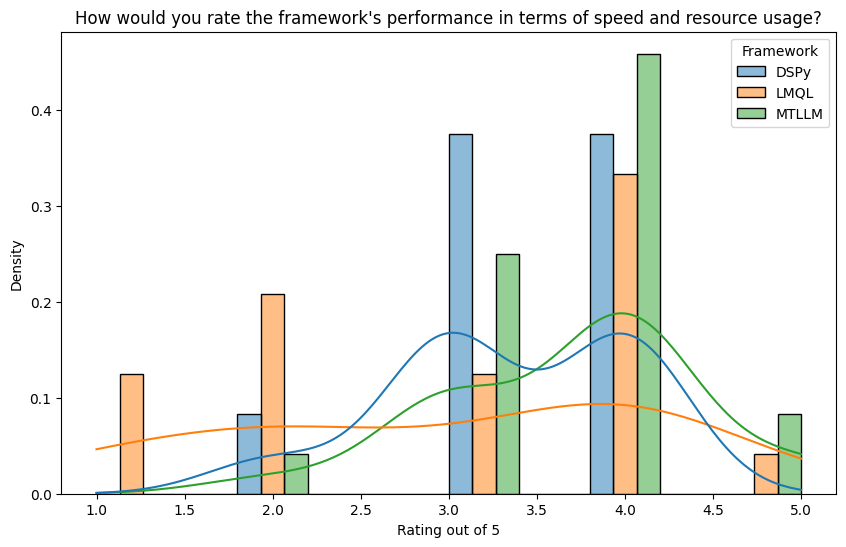

[<matplotlib.patches.Rectangle object at 0x7fbc26444170>, <matplotlib.patches.Rectangle object at 0x7fbc264445f0>, <matplotlib.patches.Rectangle object at 0x7fbc1ba020c0>]


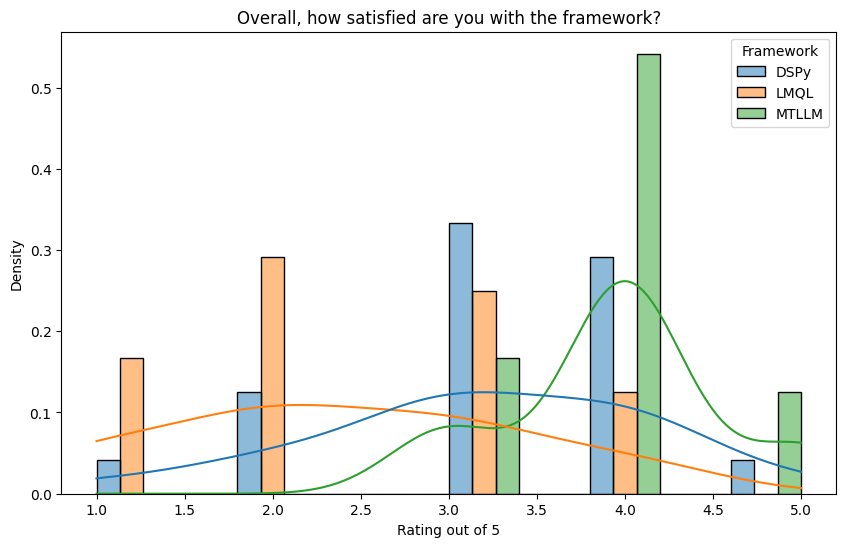

[<matplotlib.patches.Rectangle object at 0x7fbc2616bd10>, <matplotlib.patches.Rectangle object at 0x7fbc2616b800>, <matplotlib.patches.Rectangle object at 0x7fbc2616a390>]


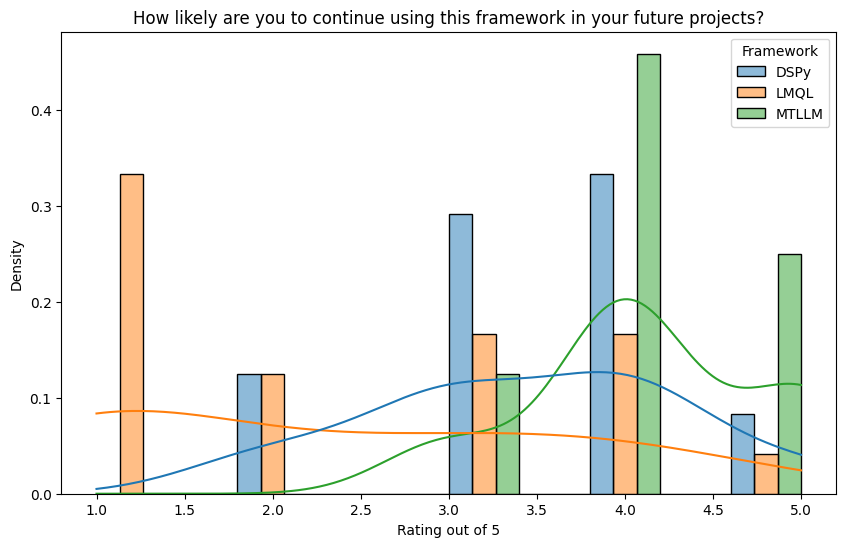

In [46]:
for question in questions.keys():
    data_set = questions[question]
    plt.figure(figsize=(10, 6))
    histplot = sns.histplot(pd.melt(data_set, value_name='values', var_name='framework'), x='values', hue='framework', kde=False, stat="density", bins=10, multiple="dodge")
    # sns.histplot(data_set['[DSPy]'],kde=True, stat='density', bins=10, color='red', label='DSPy', alpha=0.5, multiple="dodge")
    # sns.histplot(data_set['[MTLLM]'],kde=True, stat='density', bins=10, color='green', label='MTLLM', alpha=0.5, multiple="dodge")
    # sns.histplot(data_set['[LMQL]'],kde=True, stat='density', bins=10, color='blue', label='LMQL', alpha=0.5, multiple="dodge")
    plt.title(f'{question}')
    plt.xlabel('Rating out of 5')
    plt.ylabel('Density')
    legend = histplot.get_legend()
    print(legend.legend_handles)
    plt.legend(legend.legend_handles, ['DSPy','LMQL', 'MTLLM'], title='Framework', loc='upper right')
    # plt.tight_layout()

    plt.show()